# Groupby for bar charts

## Load data

In [1]:
path = '../../data/EIA/fuel_type_data_california.parquet'

In [2]:
import pandas as pd
df = pd.read_parquet(path)

df

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2025-04-22 20:00:00-07:00,CAL,California,BAT,Battery storage,179,megawatthours
1,2025-04-22 20:00:00-07:00,CAL,California,COL,Coal,216,megawatthours
2,2025-04-22 20:00:00-07:00,CAL,California,GEO,Geothermal,457,megawatthours
3,2025-04-22 20:00:00-07:00,CAL,California,NG,Natural Gas,8601,megawatthours
4,2025-04-22 20:00:00-07:00,CAL,California,NUC,Nuclear,1134,megawatthours
...,...,...,...,...,...,...,...
452543,2018-12-31 17:00:00-07:00,CAL,California,OIL,Petroleum,88,megawatthours
452544,2018-12-31 17:00:00-07:00,CAL,California,OTH,Other,697,megawatthours
452545,2018-12-31 17:00:00-07:00,CAL,California,SUN,Solar,1595,megawatthours
452546,2018-12-31 17:00:00-07:00,CAL,California,WAT,Hydro,2880,megawatthours


In [3]:
df = df.set_index('period').sort_index()
df = df.loc['2024', ['type-name', 'value']]
df.columns = ['technology', 'energy']

df

,technology,energy
period,,
2024-01-01 00:00:00-07:00,Wind,243
2024-01-01 00:00:00-07:00,Hydro,3541
2024-01-01 00:00:00-07:00,Solar,-32
2024-01-01 00:00:00-07:00,Other,1538
2024-01-01 00:00:00-07:00,Petroleum,46
...,...,...
2024-12-31 23:00:00-07:00,Petroleum,45
2024-12-31 23:00:00-07:00,Other,2892
2024-12-31 23:00:00-07:00,Solar,59


## Calculate temporal properties

In [5]:
from modules import utils
df = utils.add_time_features(df)

df

,technology,energy,year,month,day,hour,weekday,weekend
period,,,,,,,,
2024-01-01 00:00:00-07:00,Wind,243,2024,1,1,0,0,False
2024-01-01 00:00:00-07:00,Hydro,3541,2024,1,1,0,0,False
2024-01-01 00:00:00-07:00,Solar,-32,2024,1,1,0,0,False
2024-01-01 00:00:00-07:00,Other,1538,2024,1,1,0,0,False
2024-01-01 00:00:00-07:00,Petroleum,46,2024,1,1,0,0,False
...,...,...,...,...,...,...,...,...
2024-12-31 23:00:00-07:00,Petroleum,45,2024,12,31,23,1,False
2024-12-31 23:00:00-07:00,Other,2892,2024,12,31,23,1,False
2024-12-31 23:00:00-07:00,Solar,59,2024,12,31,23,1,False


## Steps

### Aggregate data with groupby

In [6]:
cols_cat = ['hour', 'technology']
cols_num = 'energy'

r = df.groupby(cols_cat)[cols_num].agg(func='sum')
r

hour  technology 
0     Coal            158031
      Hydro          1694126
      Natural Gas    4661273
      Nuclear         765946
      Other           836003
                      ...   
23    Nuclear         765440
      Other          1323775
      Petroleum        21735
      Solar             5230
      Wind           1058245
Name: energy, Length: 192, dtype: int64

### Reset index to transform result into a data frame

In [7]:
r = r.reset_index()
r

,hour,technology,energy
0,0,Coal,158031
1,0,Hydro,1694126
2,0,Natural Gas,4661273
3,0,Nuclear,765946
4,0,Other,836003
...,...,...,...
187,23,Nuclear,765440
188,23,Other,1323775
189,23,Petroleum,21735
190,23,Solar,5230


### Bar chart

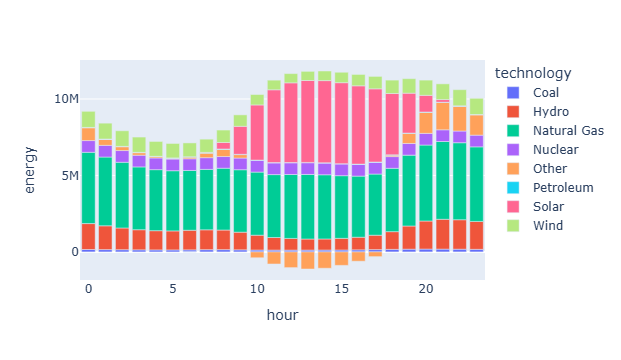

In [8]:
import plotly.express as px
fig = px.bar(
    data_frame=r,
    x='hour',
    y=cols_num,
    color='technology',
)

fig

## Different parameters to visualize the bar chart

### Aggregate by 3 categorical columns

In [9]:
cols_cat = ['hour', 'technology', 'month']
cols_num = 'energy'

r = df.groupby(cols_cat)[cols_num].agg(func='sum')
r = r.reset_index()
r

,hour,technology,month,energy
0,0,Coal,1,7974
1,0,Coal,2,6698
2,0,Coal,3,6460
3,0,Coal,4,3337
4,0,Coal,5,6004
...,...,...,...,...
2299,23,Wind,8,110859
2300,23,Wind,9,88637
2301,23,Wind,10,70385
2302,23,Wind,11,56956


### Plot with facets

#### Columns

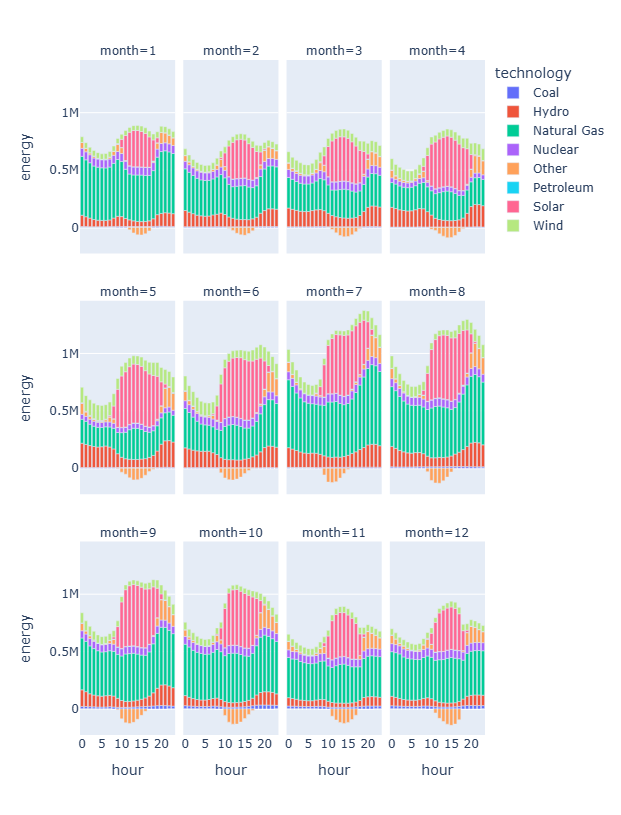

In [13]:
fig = px.bar(
    data_frame=r,
    x="hour",
    y=cols_num,
    color="technology",
    facet_col="month",
    facet_col_wrap=4,
)

fig.update_layout(width=1500, height=800)

#### Rows

### Aggregate by 4 categorical columns

,hour,technology,month,weekday,energy
0,0,Coal,1,0,1380
1,0,Coal,1,1,1397
...,...,...,...,...,...
16126,23,Wind,12,5,8895
16127,23,Wind,12,6,12396
